In [1]:
import numpy as np
import random
import os

from scipy import signal
from matplotlib import pyplot as plt

import pandas as pd
from tqdm.notebook import tqdm
%matplotlib inline
import matplotlib.pyplot as plt



from utils.augment import noise_augment, shift_augment
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

from utils.deep import preProcess, smoothLabels, oneHot, applyOneHot, evaluate_set
from utils.visualize import showMe, showHistory
#from utils.record import preProcess

from config.default import *

%load_ext autoreload
%autoreload 2


C:\Users\Nemes\anaconda3\envs\tf\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Nemes\anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Nemes\anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Nemes\anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
root_path = 'C:/resources/EMG/'

post_fix = '_1s_cleaned'
include = ['S101']
sessions = []

for subject in os.listdir(root_path):
    if subject in include:
        for session in os.listdir(os.path.join(root_path,subject)):
            sessions.append(os.path.join(root_path,subject, session))
            break


#ACTUALLY LOAD TRAIN DATA
records = {}
for c in settings['classes']:
    class_data = []
    for session in sessions:
        class_data.append(np.load(os.path.join(session,c+post_fix+'.npy'),allow_pickle=True))
    records[c] = np.concatenate(class_data)


print(f"{len(sessions)} sessions loaded for training")



1 sessions loaded for training


In [10]:
def showClass(c,limit = 9999999999):
    data = records[c]
    #print(data.shape)
    #data = noise_augment(data)
    data = shift_augment(data)
    print(f'{len(data)} samples in {c}')
    
    plt.rcParams["figure.figsize"] = [10, 20]
    fig, ax = plt.subplots(facecolor ='#A0A0A0')

    i = 0
    for i in range(len(data)):
        plt.subplot(10, 5, (i%50)+1)
        for d in data[i]:
            plt.plot(d)
            plt.ylim(-1, 1)
        if i == 49:
            plt.show()
        if i == limit:
            break

48 samples in Rest


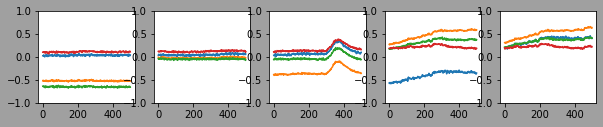

In [12]:
showClass('Rest', limit = 4)

48 samples in Rest


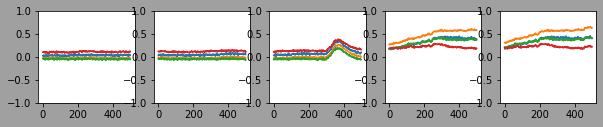

In [5]:
showClass('Rest', limit = 4)

75 samples in Eyebrow


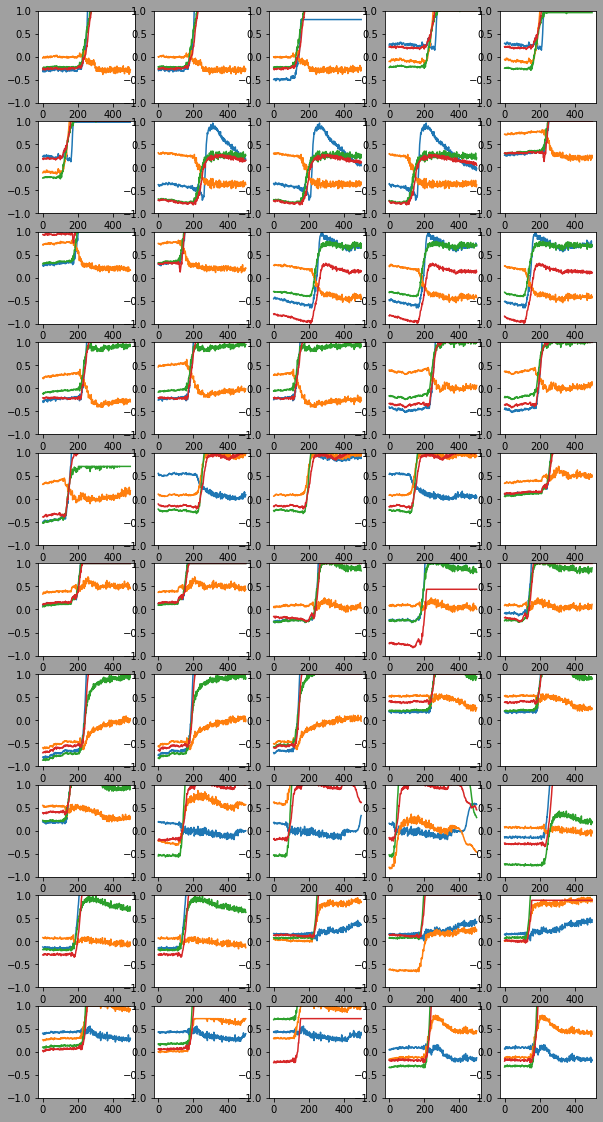

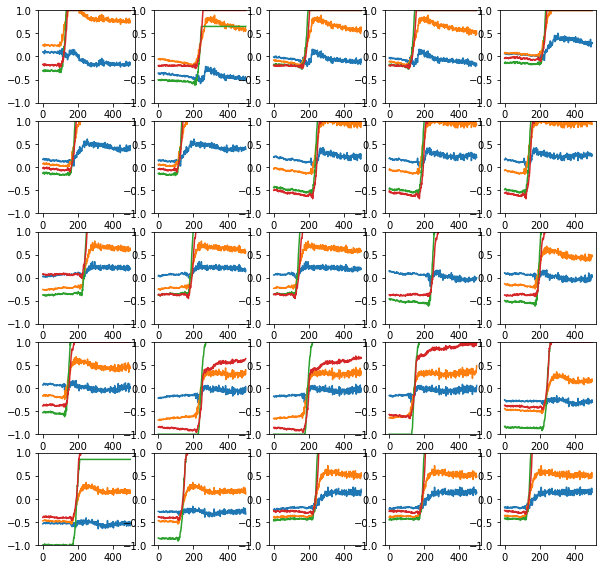

In [13]:
showClass('Eyebrow')

54 samples in Chew


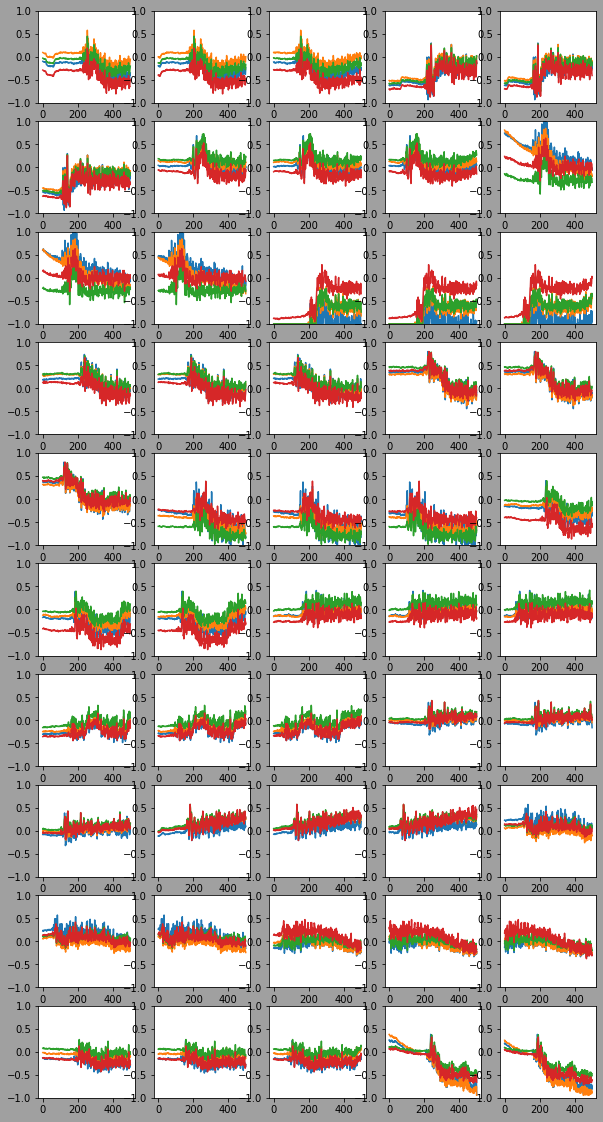

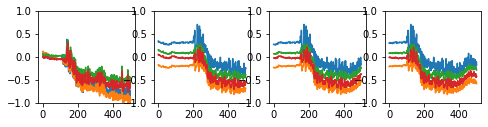

In [27]:
showClass('Chew')

12 samples in Smile


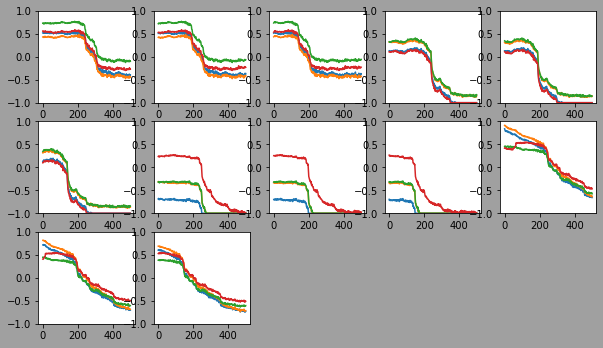

In [28]:
showClass('Smile')